<table>
    <tr>
        <td>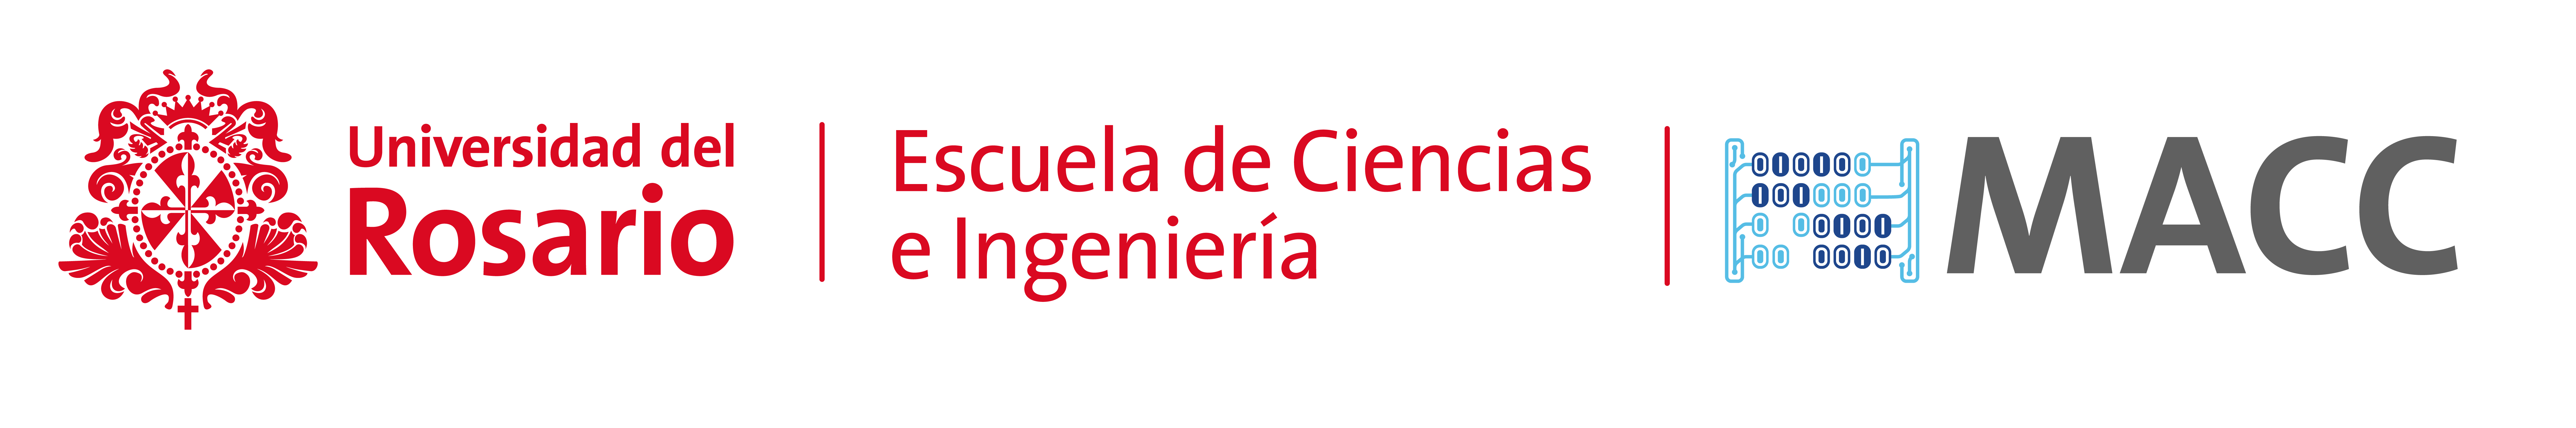</td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;text-align:center">   Aprendizaje basado en el error         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Aprendizaje Automático de Máquina </p></tp>
            <tp><p style="font-size:80%;text-align:center">Maestría MACC 2025-2</p></tp>
            <tp><p style="font-size:80%;text-align:center">Prof. Luis E. Seijas</p></tp>
        </td>
    </tr>
</table>

# Aprendizaje basado en la medida del error

In [1]:
# importar librerias

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
np.random.seed(183663)

## Generación de Datos Sintéticos

En esta celda, se generan datos sintéticos para simular un problema de regresión lineal. Los datos se generan siguiendo el modelo lineal:

$$
y = w_0 + w_1x_1 + \epsilon
$$

Donde:
- $w_0 = 4$ es el término de intercepción (bias).
- $w_1 = 3$ es el coeficiente de la característica $x_1$.
- $\epsilon \sim \mathcal{N}(0, 1)$ es un ruido gaussiano con media cero y varianza unitaria.

El código:


In [2]:
# Generar datos aleatorios para X y y (único conjunto de datos para todo el notebook)
m = 100  # Número de instancias
X = 2 * np.random.rand(m, 1)  # Matriz de características con valores aleatorios entre 0 y 2
y = 4 + 3 * X + np.random.randn(m, 1)  # Vector objetivo con ruido añadido
X_b = np.c_[np.ones((m, 1)), X]  # Concatenar una columna de unos a X

# Calcular los pesos óptimos (w_best) usando la fórmula de la ecuación normal
w_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # w = (X^T * X)^(-1) * X^T * y

# Mostrar los pesos óptimos
print(f"Pesos óptimos: w0 = {w_best[0][0]:.2f}, w1 = {w_best[1][0]:.2f}")

Pesos óptimos: w0 = 4.15, w1 = 2.83


## Predicción de Nuevos Valores y Visualización de Resultados

En la celda inferior, se realiza la predicción de valores para nuevas instancias utilizando el modelo de regresión lineal ajustado previamente. Los pasos matemáticos y el razonamiento detrás del código son los siguientes:

1. **Definición de Nuevas Instancias**:
    Se definen dos nuevas instancias para las cuales se desea predecir el valor de la variable objetivo \( y \). Estas instancias están representadas por la matriz:
    $$
    X_{\text{new}} = 
    \begin{bmatrix}
    0 \\
    2
    \end{bmatrix}
    $$

2. **Inclusion del Término de Sesgo**:
    Para incluir el término de sesgo $ x_0 = 1 $, se concatena una columna de unos a $ X_{\text{new}} $, obteniendo:
    $$
    X_{\text{new\_b}} = 
    \begin{bmatrix}
    1 & 0 \\
    1 & 2
    \end{bmatrix}
    $$

3. **Cálculo de las Predicciones**:
    Las predicciones para las nuevas instancias se calculan utilizando la ecuación del modelo de regresión lineal:
    $$
    \hat{y} = X_{\text{new\_b}} \cdot w_{\text{best}}
    $$
    Donde:
    - $ X_{\text{new\_b}} $ es la matriz de características con el término de sesgo.
    - $ w_{\text{best}} $ son los pesos óptimos calculados previamente:
      $$
      w_{\text{best}} = 
      \begin{bmatrix}
      3.923 \\
      3.062
      \end{bmatrix}
      $$
    Sustituyendo los valores:
    $$
    \hat{y} = 
    \begin{bmatrix}
    1 & 0 \\
    1 & 2
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
    3.923 \\
    3.062
    \end{bmatrix}
    =
    \begin{bmatrix}
    3.923 \\
    10.047
    \end{bmatrix}
    $$

4. **Visualización de Resultados**:
    - Se grafica la línea de regresión que conecta los puntos predichos $ (0, 3.923) $ y $ (2, 10.047) $.
    - Los puntos de datos originales ($ X, y $) se representan como puntos dispersos en el plano.

Esta visualización permite observar cómo el modelo ajustado se comporta al predecir valores para nuevas instancias, mostrando la relación lineal aprendida entre las características y la variable objetivo.

Pesos óptimos: w0 = 4.15, w1 = 2.83


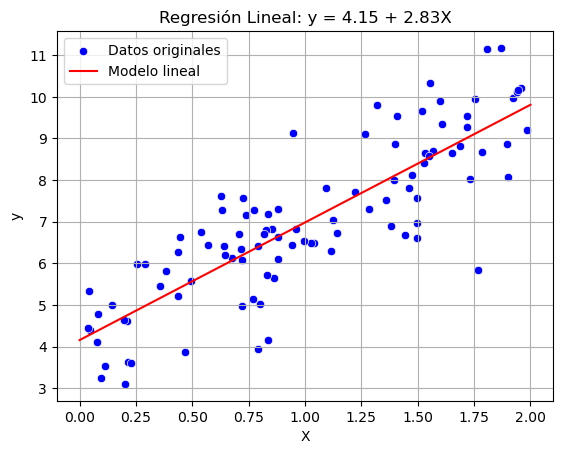

In [3]:
X_new = np.array([[0], [2]])  # Nuevas instancias para predecir
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Agregar término de sesgo

# Realizar predicciones
y_predict = X_new_b @ w_best
# Crear un DataFrame para facilitar la visualización con seaborn
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Graficar los datos originales con seaborn
sns.scatterplot(data=data, x='X', y='y', label='Datos originales', color='blue')

# Graficar la línea de regresión
sns.lineplot(x=X_new.flatten(), y=y_predict.flatten(), color='red', label='Modelo lineal')

print(f"Pesos óptimos: w0 = {w_best[0][0]:.2f}, w1 = {w_best[1][0]:.2f}")

# Incluir la ecuación del modelo lineal en el título
plt.title(f"Regresión Lineal: y = {w_best[0][0]:.2f} + {w_best[1][0]:.2f}X")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)


Coeficientes del modelo: w0 = 4.15, w1 = 2.83


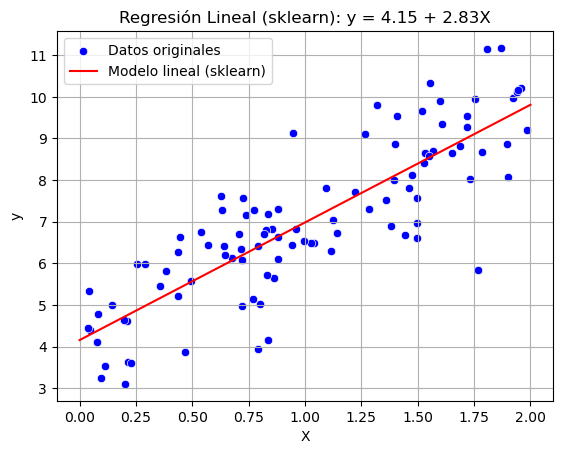

In [4]:
# Crear y ajustar el modelo de regresión lineal con sklearn
model = LinearRegression()
model.fit(X, y)

# Realizar predicciones para las nuevas instancias
y_predict_sklearn = model.predict(X_new)

# Crear un DataFrame para facilitar la visualización con seaborn
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

print(f"Coeficientes del modelo: w0 = {model.intercept_[0]:.2f}, w1 = {model.coef_[0][0]:.2f}")

# Graficar los datos originales con seaborn
sns.scatterplot(data=data, x='X', y='y', label='Datos originales', color='blue')

# Graficar la línea de regresión
sns.lineplot(x=X_new.flatten(), y=y_predict_sklearn.flatten(), color='red', label='Modelo lineal (sklearn)')

# Incluir la ecuación del modelo lineal en el título
plt.title(f"Regresión Lineal (sklearn): y = {model.intercept_[0]:.2f} + {model.coef_[0][0]:.2f}X")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Definir el rango de valores para los pesos w0 y w1
w0_vals = np.linspace(w_best[0][0] - 1, w_best[0][0] + 1, 100)
w1_vals = np.linspace(w_best[1][0] - 1, w_best[1][0] + 1, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)

# Calcular el MSE para cada combinación de w0 y w1
mse_vals = np.zeros(W0.shape)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w_temp = np.array([[W0[i, j]], [W1[i, j]]])
        y_pred_temp = X_b @ w_temp
        mse_vals[i, j] = np.mean((y_pred_temp - y)**2)

# Crear la figura para la superficie de error
fig = go.Figure(data=[go.Surface(z=mse_vals, x=W0, y=W1, colorscale='Viridis')])

# Configurar etiquetas y título del gráfico
fig.update_layout(
    title='Superficie de Error (MSE)',
    scene=dict(
        xaxis_title='w0',
        yaxis_title='w1',
        zaxis_title='MSE'
    ),
    template='plotly_white'
)

# Mostrar la figura interactiva
fig.show()

## Descenso del Gradiente para la Regresión Lineal

En la celda inferior, se implementa el algoritmo de **descenso del gradiente** para ajustar un modelo de regresión lineal. Este método optimiza los pesos del modelo minimizando la función de costo, que en este caso es el **error cuadrático medio (MSE)**. A continuación, se detalla el razonamiento matemático:

1. #### Función de Costo:
    La función de costo que se minimiza es el error cuadrático medio:
    $$
    J(\mathbf{w}) = \frac{1}{m} \sum_{i=1}^m \left( h_{\mathbf{w}}(x^{(i)}) - y^{(i)} \right)^2
    $$
    Donde:
    - $m$ es el número de instancias en el conjunto de datos.
    - $h_{\mathbf{w}}(x^{(i)})$ es la predicción del modelo para la instancia $i$, calculada como:
      $$
      h_{\mathbf{w}}(x^{(i)}) = w_0 + w_1 x_1^{(i)}
      $$
      o, en forma matricial:
      $$
      h_{\mathbf{w}}(\mathbf{X}) = \mathbf{X_b} \cdot \mathbf{w}
      $$
      donde $\mathbf{X_b}$ es la matriz de características con el término de sesgo añadido.

2. #### Gradiente de la Función de Costo:
    Para minimizar $J(\mathbf{w})$, se calcula su gradiente con respecto a los pesos $\mathbf{w}$:
    $$
    \nabla J(\mathbf{w}) = \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \frac{2}{m} \mathbf{X_b}^T \cdot \left( \mathbf{X_b} \cdot \mathbf{w} - \mathbf{y} \right)
    $$
    Donde:
    - $\mathbf{X_b}$ es la matriz de diseño que incluye el término de sesgo.
    - $\mathbf{w}$ es el vector de pesos.
    - $\mathbf{y}$ es el vector de valores objetivo.

3. #### Actualización de los Pesos:
    Los pesos se actualizan iterativamente utilizando la regla de actualización del descenso del gradiente:
    $$
    \mathbf{w} := \mathbf{w} - \eta \cdot \nabla J(\mathbf{w})
    $$
    Donde:
    - $\eta$ es la **tasa de aprendizaje**, que controla el tamaño de los pasos en la dirección del gradiente.
    - $\nabla J(\mathbf{w})$ es el gradiente calculado en el paso actual.

4. #### Inicialización:
    - Los pesos $\mathbf{w}$ se inicializan aleatoriamente.
    - Se define un número fijo de iteraciones $n_{\text{iterations}}$ para realizar las actualizaciones.

5. #### Iteraciones:
    En cada iteración:
    - Se calcula el gradiente $\nabla J(\mathbf{w})$.
    - Se actualizan los pesos $\mathbf{w}$ utilizando la regla de actualización.

6. #### Convergencia:
    Después de un número suficiente de iteraciones, los pesos $\mathbf{w}$ convergen a valores cercanos al óptimo, minimizando la función de costo.

### Ecuaciones Implementadas

- Inicialización:
  $$
  \mathbf{w} = \text{rand}(2, 1)
  $$
- Gradiente:
  $$
  \text{grad} = \frac{2}{m} \mathbf{X_b}^T \cdot \left( \mathbf{X_b} \cdot \mathbf{w} - \mathbf{y} \right)
  $$
- Actualización de pesos:
  $$
  \mathbf{w} := \mathbf{w} - \eta \cdot \text{grad}
  $$

### Resultado Final

Al finalizar las iteraciones, el vector de pesos $\mathbf{w}$ contiene los valores ajustados que minimizan el error cuadrático medio. Estos pesos representan los parámetros del modelo de regresión lineal ajustado a los datos.


In [6]:
def gradient_descent(X_b, y, eta=0.1, n_iterations=1000, tol=1e-6):
    """
    Implementa el descenso por gradiente para un modelo de regresión lineal con criterio de parada.

    Parámetros:
    - X_b: numpy.ndarray, matriz de características con el término de sesgo incluido.
    - y: numpy.ndarray, vector de valores objetivo.
    - eta: float, tasa de aprendizaje (por defecto 0.1).
    - n_iterations: int, número máximo de iteraciones (por defecto 1000).
    - tol: float, tolerancia para el criterio de parada (por defecto 1e-6).

    Retorna:
    - w: numpy.ndarray, pesos finales ajustados.
    """
    m = len(y)  # Número de instancias
    w = np.random.randn(X_b.shape[1], 1)  # Inicializar pesos aleatoriamente

    for i in range(n_iterations):
        # Calcular el gradiente
        grad = 2 / m * X_b.T @ (X_b @ w - y)
        # Actualizar los pesos
        w_new = w - eta * grad
        # Verificar el criterio de parada
        if np.linalg.norm(w_new - w) < tol:
            print(f"Convergencia alcanzada en la iteración {i}")
            break
        w = w_new
    return w

# Aplicar la función gradient_descent a los datos originales
w_final = gradient_descent(X_b, y, eta=0.1, n_iterations=100000)
print(f"Pesos obtenidos por descenso por gradiente: w0 = {w_final[0][0]:.2f}, w1 = {w_final[1][0]:.2f}")

Convergencia alcanzada en la iteración 371
Pesos obtenidos por descenso por gradiente: w0 = 4.15, w1 = 2.83


Pesos finales después de 1000 iteraciones: w0 = 4.15, w1 = 2.83


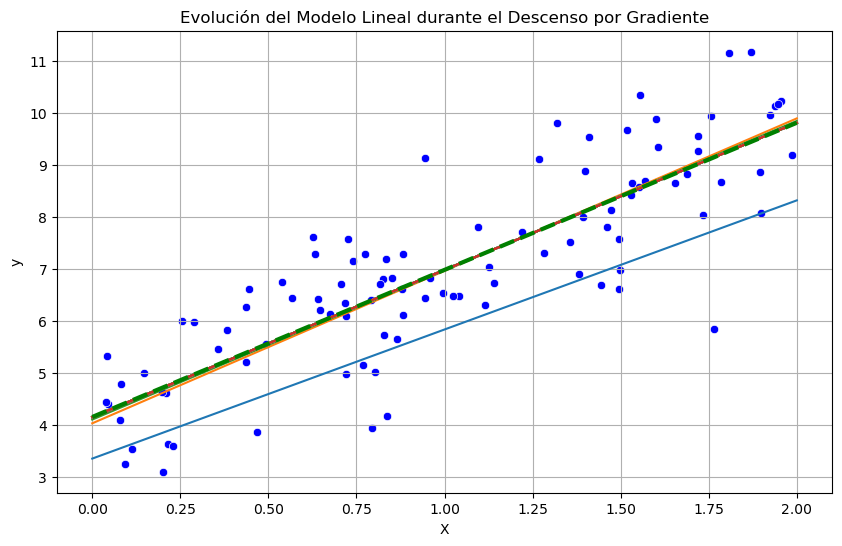

In [7]:
# Usar el conjunto de datos único definido al inicio: X, y, X_b, m
w = 2 + np.random.rand(2, 1)
n_iterations = 1000
eta = 0.1
# Crear una figura para graficar
plt.figure(figsize=(10, 6))

# Iterar sobre las actualizaciones de los pesos
for i in range(n_iterations):
    # Calcular el gradiente
    grad = 2 / m * X_b.T @ (X_b @ w - y)
    # Actualizar los pesos
    w = w - eta * grad

    # Graficar cada 30 iteraciones para no sobrecargar la visualización
    if i % 30 == 0:
        y_predict_iter = np.c_[np.ones((2, 1)), np.array([[0], [2]])] @ w
        plt.plot(np.array([[0], [2]]).flatten(), y_predict_iter.flatten(), label=f"Iteración {i}")

print(f"Pesos finales después de {n_iterations} iteraciones: w0 = {w[0][0]:.2f}, w1 = {w[1][0]:.2f}")

# Graficar los datos originales
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})
sns.scatterplot(data=data, x='X', y='y', color='blue', legend=False)

# Marcar la última iteración
y_predict_last = np.c_[np.ones((2, 1)), np.array([[0], [2]])] @ w
plt.plot(np.array([[0], [2]]).flatten(), y_predict_last.flatten(), color='green', linewidth=3, label="Última iteración", linestyle='--')

# Configurar el gráfico
plt.title("Evolución del Modelo Lineal durante el Descenso por Gradiente")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

## Descenso del Gradiente Estocástico

En la celda de abajo, se implementa el algoritmo de **descenso del gradiente estocástico (SGD)** para ajustar un modelo de regresión lineal. Este método optimiza los pesos del modelo minimizando la función de costo, que en este caso es el **error cuadrático medio (MSE)**. A continuación, se detalla el razonamiento matemático:

1. #### Función de Costo
La función de costo que se minimiza es el error cuadrático medio:
$$
J(\mathbf{w}) = \frac{1}{m} \sum_{i=1}^m \left( h_{\mathbf{w}}(x^{(i)}) - y^{(i)} \right)^2
$$
Donde:
- $m$ es el número de instancias en el conjunto de datos.
- $h_{\mathbf{w}}(x^{(i)})$ es la predicción del modelo para la instancia $i$, calculada como:
    $$
    h_{\mathbf{w}}(x^{(i)}) = w_0 + w_1 x_1^{(i)}
    $$
    o, en forma matricial:
    $$
    h_{\mathbf{w}}(\mathbf{X}) = \mathbf{X_b} \cdot \mathbf{w}
    $$
    donde $\mathbf{X_b}$ es la matriz de características con el término de sesgo añadido.

2. #### Gradiente de la Función de Costo
Para minimizar $J(\mathbf{w})$, se calcula su gradiente con respecto a los pesos $\mathbf{w}$:
$$
\nabla J(\mathbf{w}) = \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \frac{2}{m} \mathbf{X_b}^T \cdot \left( \mathbf{X_b} \cdot \mathbf{w} - \mathbf{y} \right)
$$
En el caso del descenso del gradiente estocástico, el gradiente se calcula utilizando una sola instancia aleatoria $(x^{(i)}, y^{(i)})$ en cada paso:
$$
\text{grad} = 2 \cdot \mathbf{x}_b^{(i)T} \cdot \left( \mathbf{x}_b^{(i)} \cdot \mathbf{w} - y^{(i)} \right)
$$
Donde:
- $\mathbf{x}_b^{(i)}$ es la fila $i$-ésima de la matriz $\mathbf{X_b}$, que incluye el término de sesgo.
- $y^{(i)}$ es el valor objetivo correspondiente a la instancia $i$.

3. #### Regla de Actualización de Pesos
Los pesos se actualizan iterativamente utilizando la regla de actualización del descenso del gradiente estocástico:
$$
\mathbf{w} := \mathbf{w} - \eta \cdot \text{grad}
$$
Donde:
- $\eta$ es la **tasa de aprendizaje**, que controla el tamaño de los pasos en la dirección del gradiente.
- $\text{grad}$ es el gradiente calculado en el paso actual.

4. #### Programación de la Tasa de Aprendizaje
En este caso, la tasa de aprendizaje $\eta$ se ajusta dinámicamente en cada iteración utilizando una programación de tasa de aprendizaje:
$$
\eta = \frac{t_0}{t + t_1}
$$
Donde:
- $t_0$ y $t_1$ son hiperparámetros que controlan la velocidad de decrecimiento de $\eta$.
- $t$ es el índice de la iteración actual.

5. #### Algoritmo
El algoritmo se ejecuta durante un número fijo de épocas $n_{\text{epochs}}$. En cada época:
1. Se recorren todas las instancias del conjunto de datos.
2. Para cada instancia:
     - Se selecciona un índice aleatorio $j$.
     - Se calcula el gradiente $\text{grad}$ utilizando la instancia $(x^{(j)}, y^{(j)})$.
     - Se actualizan los pesos $\mathbf{w}$ utilizando la regla de actualización.

6. #### Convergencia
Después de un número suficiente de épocas, los pesos $\mathbf{w}$ convergen a valores cercanos al óptimo, minimizando la función de costo.

### Ecuaciones Implementadas en el Código
- Gradiente:
    $$
    \text{grad} = 2 \cdot \mathbf{x}_b^{(j)T} \cdot \left( \mathbf{x}_b^{(j)} \cdot \mathbf{w} - y^{(j)} \right)
    $$
- Actualización de pesos:
    $$
    \mathbf{w} := \mathbf{w} - \eta \cdot \text{grad}
    $$
- Programación de la tasa de aprendizaje:
    $$
    \eta = \frac{t_0}{t + t_1}
    $$

### Resultado Final
Al finalizar las épocas, el vector de pesos $\mathbf{w}$ contiene los valores ajustados que minimizan el error cuadrático medio. Estos pesos representan los parámetros del modelo de regresión lineal ajustado a los datos.

In [8]:
def stochastic_gradient_descent(X_b, y, n_epochs=200, t0=5, t1=50, tol=1e-6):
    """
    Implementa el descenso de gradiente estocástico con criterio de parada.

    Parámetros:
    - X_b: numpy.ndarray, matriz de características con el término de sesgo incluido.
    - y: numpy.ndarray, vector de valores objetivo.
    - n_epochs: int, número máximo de épocas (por defecto 200).
    - t0, t1: float, parámetros para la programación de la tasa de aprendizaje.
    - tol: float, tolerancia para el criterio de parada (por defecto 1e-6).

    Retorna:
    - w: numpy.ndarray, pesos finales ajustados.
    """
    def learning_schedule(t):
        return t0 / (t + t1)

    m = len(y)  # Número de instancias
    w = np.random.randn(X_b.shape[1], 1)  # Inicializar pesos aleatoriamente

    for epoch in range(n_epochs):
        for j in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            grad = 2 * xi.T @ (xi @ w - yi)
            eta = learning_schedule(epoch * m + j)
            w_new = w - eta * grad
            # Verificar el criterio de parada
            if np.linalg.norm(w_new - w) < tol:
                print(f"Convergencia alcanzada en la época {epoch}, iteración {j}")
                return w_new
            w = w_new
    return w

# Llamar a la función
w = stochastic_gradient_descent(X_b, y)

print(f"Pesos finales: w0 = {w[0][0]:.2f}, w1 = {w[1][0]:.2f}")

Convergencia alcanzada en la época 72, iteración 26
Pesos finales: w0 = 4.17, w1 = 2.80


In [9]:
# Inicializar listas para almacenar el camino del gradiente
w0_path_new = []
w1_path_new = []
n_epochs = 50

def learning_schedule(t, t0=5, t1=50):
        return t0 / (t + t1)


# Implementar el descenso de gradiente estocástico y registrar el camino
w = np.random.randn(2, 1)  # Inicializar los pesos aleatoriamente
for epoch in range(n_epochs):
        for j in range(m):
                random_index = np.random.randint(m)
                xi = X_b[random_index:random_index+1]
                yi = y[random_index:random_index+1]
                grad = 2 * xi.T @ (xi @ w - yi)
                eta = learning_schedule(epoch * m + j)
                w = w - eta * grad
                # Registrar los valores de w0 y w1
                w0_path_new.append(w[0, 0])
                w1_path_new.append(w[1, 0])

# Crear la figura para el mapa de contornos
fig = go.Figure()

# Añadir el mapa de contornos
fig.add_trace(go.Contour(
                z=mse_vals,  # Valores de MSE
                x=W0[0],  # Valores de w0 (eje x)  
                y=W1[:, 0],  # Valores de w1 (eje y)
                colorscale='Viridis',  # Escala de colores
                contours=dict(showlabels=True),  # Mostrar etiquetas en los contornos
                name='Mapa de contornos'
))

# Añadir el camino seguido por el gradiente estocástico
fig.add_trace(go.Scatter(
                x=w0_path_new,  # Valores de w0 en el camino
                y=w1_path_new,  # Valores de w1 en el camino
                mode='lines+markers',  # Mostrar líneas y marcadores
                marker=dict(size=5, color='red'),  # Configuración de los marcadores
                line=dict(color='red', width=2),  # Configuración de las líneas
                name='Camino del gradiente'  # Nombre de la traza
))

# Configurar etiquetas y título del gráfico
fig.update_layout(
                title='Mapa de contornos y camino del gradiente estocástico',  # Título del gráfico
                xaxis_title='w0',  # Etiqueta del eje x
                yaxis_title='w1',  # Etiqueta del eje y
                legend=dict(x=0.8, y=0.9)  # Posición de la leyenda
)

print(f"Pesos finales: w0 = {w[0][0]:.2f}, w1 = {w[1][0]:.2f}")
# Mostrar la figura interactiva
fig.show()

Pesos finales: w0 = 4.14, w1 = 2.81


In [10]:
from sklearn.linear_model import SGDRegressor

# Crear y ajustar el modelo de regresión lineal usando descenso por gradiente
sgd_reg = SGDRegressor(loss='squared_error', max_iter=1000, tol=1e-3, eta0=0.1, learning_rate='constant', random_state=42)
sgd_reg.fit(X, y.ravel())  # Ajustar el modelo a los datos

# Obtener los coeficientes y el intercepto
w0_sgd = sgd_reg.intercept_[0]  # Intercepto (w0)
w1_sgd = sgd_reg.coef_[0]       # Coeficiente (w1)

print(f"Pesos óptimos usando SGDRegressor: w0 = {w0_sgd:.2f}, w1 = {w1_sgd:.2f}")


Pesos óptimos usando SGDRegressor: w0 = 4.02, w1 = 2.59


## Descenso por Gradiente en Mini-Batch

En la celda inferior, se implementa el algoritmo de **descenso por gradiente en mini-batch** para ajustar un modelo de regresión lineal. Este método optimiza los pesos del modelo minimizando la función de costo, que en este caso es el **error cuadrático medio (MSE)**. A continuación, se detalla el razonamiento matemático:

1. #### Función de Costo
La función de costo que se minimiza es el error cuadrático medio:
$$
J(\mathbf{w}) = \frac{1}{m} \sum_{i=1}^m \left( h_{\mathbf{w}}(x^{(i)}) - y^{(i)} \right)^2
$$
Donde:
- $m$ es el número de instancias en el conjunto de datos.
- $h_{\mathbf{w}}(x^{(i)})$ es la predicción del modelo para la instancia $i$, calculada como:
$$
h_{\mathbf{w}}(x^{(i)}) = w_0 + w_1 x_1^{(i)}
$$
o, en forma matricial:
$$
h_{\mathbf{w}}(\mathbf{X}) = \mathbf{X_b} \cdot \mathbf{w}
$$
donde $\mathbf{X_b}$ es la matriz de características con el término de sesgo añadido.

2. #### Gradiente de la Función de Costo
Para minimizar $J(\mathbf{w})$, se calcula su gradiente con respecto a los pesos $\mathbf{w}$:
$$
\nabla J(\mathbf{w}) = \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \frac{2}{m} \mathbf{X_b}^T \cdot \left( \mathbf{X_b} \cdot \mathbf{w} - \mathbf{y} \right)
$$
En el caso del descenso por gradiente en mini-batch, el gradiente se calcula utilizando un subconjunto (mini-batch) de las instancias $$(x^{(i)}, y^{(i)})$$ en cada paso:
$$
\text{grad} = \frac{2}{\text{batch\_size}} \cdot \mathbf{X}_{\text{mini}}^T \cdot \left( \mathbf{X}_{\text{mini}} \cdot \mathbf{w} - \mathbf{y}_{\text{mini}} \right)
$$
Donde:
- $\mathbf{X}_{\text{mini}}$ es la matriz de características del mini-batch.
- $\mathbf{y}_{\text{mini}}$ es el vector de valores objetivo correspondiente al mini-batch.

3. #### Regla de Actualización de Pesos
Los pesos se actualizan iterativamente utilizando la regla de actualización del descenso por gradiente:
$$
\mathbf{w} := \mathbf{w} - \eta \cdot \text{grad}
$$
Donde:
- $\eta$ es la **tasa de aprendizaje**, que controla el tamaño de los pasos en la dirección del gradiente.
- $\text{grad}$ es el gradiente calculado en el paso actual.

4. #### Programación de la Tasa de Aprendizaje
En este caso, la tasa de aprendizaje $\eta$ se ajusta dinámicamente en cada iteración utilizando una programación de tasa de aprendizaje:
$$
\eta = \frac{t_0}{t + t_1}
$$
Donde:
- $t_0$ y $t_1$ son hiperparámetros que controlan la velocidad de decrecimiento de $\eta$.
- $t$ es el índice de la iteración actual.

5. #### Algoritmo Completo
El algoritmo se ejecuta durante un número fijo de épocas $n_{\text{epochs}}$. En cada época:
1. Se barajan aleatoriamente las instancias del conjunto de datos.
2. Se dividen las instancias en mini-batches de tamaño fijo.
3. Para cada mini-batch:
    - Se calcula el gradiente $\text{grad}$ utilizando las instancias del mini-batch.
    - Se actualizan los pesos $\mathbf{w}$ utilizando la regla de actualización.

6. #### Convergencia
Después de un número suficiente de épocas, los pesos $\mathbf{w}$ convergen a valores cercanos al óptimo, minimizando la función de costo.

### Ecuaciones Implementadas
- Gradiente:
$$
\text{grad} = \frac{2}{\text{batch\_size}} \cdot \mathbf{X}_{\text{mini}}^T \cdot \left( \mathbf{X}_{\text{mini}} \cdot \mathbf{w} - \mathbf{y}_{\text{mini}} \right)
$$
- Actualización de pesos:
$$
\mathbf{w} := \mathbf{w} - \eta \cdot \text{grad}
$$
- Programación de la tasa de aprendizaje:
$$
\eta = \frac{t_0}{t + t_1}
$$

### Resultado Final
Al finalizar las épocas, el vector de pesos $\mathbf{w}$ contiene los valores ajustados que minimizan el error cuadrático medio. Estos pesos representan los parámetros del modelo de regresión lineal ajustado a los datos.

In [11]:
def mini_batch_gradient_descent(X_b, y, batch_size=10, n_epochs=200, t0=5, t1=50):
    """
    Implementa el descenso por gradiente en mini-batch.

    Parámetros:
    - X_b: numpy.ndarray, matriz de características con el término de sesgo incluido.
    - y: numpy.ndarray, vector de valores objetivo.
    - batch_size: int, tamaño del mini-batch (por defecto 20).
    - n_epochs: int, número de épocas (por defecto 200).
    - t0, t1: float, parámetros para la programación de la tasa de aprendizaje.

    Retorna:
    - w: numpy.ndarray, pesos finales ajustados.
    """
    def learning_schedule(t):
        return t0 / (t + t1)

    m = len(y)  # Número de instancias
    w = np.random.randn(X_b.shape[1], 1)  # Inicializar los pesos aleatoriamente

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)  # Barajar los índices
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]
            grad = 2 / batch_size * xi.T @ (xi @ w - yi)  # Gradiente para el mini-batch
            eta = learning_schedule(epoch * m + i)  # Tasa de aprendizaje
            w = w - eta * grad  # Actualizar los pesos

    return w

# Evaluar la función con los datos iniciales
w_mini_batch = mini_batch_gradient_descent(X_b, y, batch_size=5, n_epochs=2000)
print(f"Pesos finales después de Mini-Batch Gradient Descent: w0 = {w_mini_batch[0][0]:.2f}, w1 = {w_mini_batch[1][0]:.2f}")

Pesos finales después de Mini-Batch Gradient Descent: w0 = 4.04, w1 = 2.93


In [12]:
import time

# Parámetros ajustables para modificar el comportamiento de los métodos
eta = 0.1  # Tasa de aprendizaje para Gradient Descent
n_iterations = 1000  # Número de iteraciones para Batch Gradient Descent
n_epochs = 50  # Número de épocas para Stochastic Gradient Descent
batch_size = 10  # Tamaño del mini-batch para Mini-Batch Gradient Descent

# Generar datos aleatorios para X y y (único conjunto de datos para todo el notebook)
m = 100000  # Número de instancias
X = 2 * np.random.rand(m, 1)  # Matriz de características con valores aleatorios entre 0 y 2
y = 4 + 3 * X + np.random.randn(m, 1)  # Vector objetivo con ruido añadido
X_b = np.c_[np.ones((m, 1)), X]  # Concatenar una columna de unos a X

# Comparar Ecuación Normal
start_time_normal = time.time()
w_best_normal = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
end_time_normal = time.time()
time_normal = end_time_normal - start_time_normal

# Comparar Batch Gradient Descent
start_time_bgd = time.time()
w_bgd = gradient_descent(X_b, y, eta=eta, n_iterations=n_iterations)
end_time_bgd = time.time()
time_bgd = end_time_bgd - start_time_bgd

# Comparar Stochastic Gradient Descent
start_time_sgd = time.time()
w_sgd = stochastic_gradient_descent(X_b, y, n_epochs=n_epochs, t0=5, t1=50)
end_time_sgd = time.time()
time_sgd = end_time_sgd - start_time_sgd

# Comparar Mini-Batch Gradient Descent
start_time_mbgd = time.time()
w_mbgd = mini_batch_gradient_descent(X_b, y, batch_size=batch_size, n_epochs=n_epochs)
end_time_mbgd = time.time()
time_mbgd = end_time_mbgd - start_time_mbgd

# Comparar SGDRegressor
start_time_sgdreg = time.time()
sgd_reg = SGDRegressor(loss='squared_error', max_iter=1000, tol=1e-3, eta0=eta, learning_rate='constant', random_state=42)
sgd_reg.fit(X, y.ravel())
end_time_sgdreg = time.time()
time_sgdreg = end_time_sgdreg - start_time_sgdreg
w_sgdreg = np.array([[sgd_reg.intercept_[0]], [sgd_reg.coef_[0]]])

# Imprimir resultados
print(f"Ecuación Normal: Tiempo = {time_normal:.4f}s, Pesos = {w_best_normal.flatten()[:2]}...")
print(f"Batch Gradient Descent: Tiempo = {time_bgd:.4f}s, Pesos = {w_bgd.flatten()[:2]}...")
print(f"Stochastic Gradient Descent: Tiempo = {time_sgd:.4f}s, Pesos = {w_sgd.flatten()[:2]}...")
print(f"Mini-Batch Gradient Descent: Tiempo = {time_mbgd:.4f}s, Pesos = {w_mbgd.flatten()[:2]}...")
print(f"SGDRegressor: Tiempo = {time_sgdreg:.4f}s, Pesos = {w_sgdreg.flatten()[:2]}...")

Convergencia alcanzada en la iteración 333
Convergencia alcanzada en la época 0, iteración 1939
Ecuación Normal: Tiempo = 0.0012s, Pesos = [3.98127624 3.01253658]...
Batch Gradient Descent: Tiempo = 0.4585s, Pesos = [3.98125203 3.01255718]...
Stochastic Gradient Descent: Tiempo = 0.0140s, Pesos = [3.9881419  3.04091634]...
Mini-Batch Gradient Descent: Tiempo = 1.7054s, Pesos = [3.74912815 3.20993519]...
SGDRegressor: Tiempo = 0.0156s, Pesos = [4.01684444 3.11919009]...
